## SIR model using VFGEN

In [8]:
%%writefile sir_ode.vf
<?xml version="1.0"?>
    <VectorField Name="sir_ode">
    <Parameter Name="beta" DefaultValue="0.1" Description="Transmission parameter"/>
    <Parameter Name="mu" DefaultValue="0.05" Description="Recovery rate"/>
    <StateVariable Name="S"  Formula="-beta*S*I" DefaultInitialCondition="0.99"/>
    <StateVariable Name="I" Formula="beta*S*I-mu*I" DefaultInitialCondition="0.01"/>
    <StateVariable Name="R" Formula="mu*I" DefaultInitialCondition="0.0"/>
</VectorField>

Writing sir_ode.vf


In [9]:
!vfgen r:func sir_ode.vf

In [10]:
!cat sir_ode.R

#
# sir_ode.R
#
# R vector field functions for: sir_ode
#
# This file was generated by the program VFGEN, version: 2.6.0.dev0
# Generated on  9-Aug-2018 at 11:33
#


#
# sir_ode(t, state, parameters)
#
# The vector field function
#
sir_ode <- function(t, state, parameters) {
    S          <- state[1]
    I          <- state[2]
    R          <- state[3]
    beta       <- parameters[1]
    mu         <- parameters[2]

    vf_ <- vector(len = 3)
    vf_[1] = -I*beta*S;
    vf_[2] = -I*mu+I*beta*S;
    vf_[3] = I*mu;
    return(list(vf_))
}

#
# sir_ode_jac(t, state, parameters)
#
# The jacobian function
#
sir_ode_jac <- function(t, state, parameters) {
    S          <- state[1]
    I          <- state[2]
    R          <- state[3]
    beta       <- parameters[1]
    mu         <- parameters[2]
    jac_ = matrix(nrow = 3, ncol = 3)
    jac_[1,1] = -I*beta
    jac_[1,2] = 0
    jac_[1,3] = 0
    jac_[2,1] = I*beta
    jac_[2,2] = 0
    jac_[2,3] = 0
    jac_[3,1] = 0
    jac_[3,2] = 0
  

In [11]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
%%R
library(deSolve)
library(reshape2)

source("sir_ode.R")

parms <- c(beta=0.1,gamma=0.05)
init <- c(S=0.99,I=0.01,R=0) 
times <- seq(0,200,length.out=2001)

sir_out <- ode(y = init,
               times = times,
               func = sir_ode,
               parms = parms,
               jactype = "fullusr",
               jacfunc = sir_ode_jac,
               atol = 1e-8, rtol = 1e-6)

sir_out_long <- melt(as.data.frame(sir_out),"time")

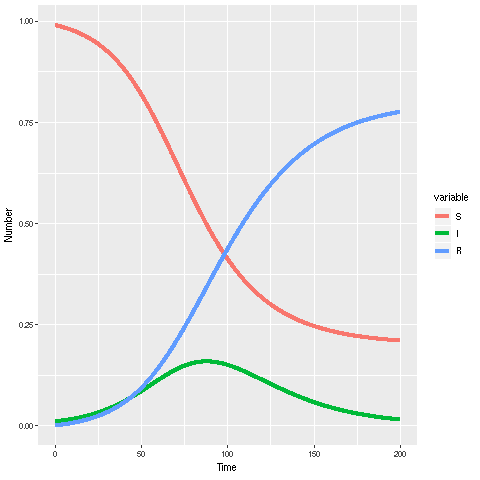

In [13]:
%%R
library(ggplot2)
ggplot(sir_out_long,aes(x=time, y=value, colour=variable, group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")